In [ ]:
import os
if 'notebooks' not in os.listdir():
    os.chdir('..')

In [ ]:
import jax
import jax.numpy as jnp

from hdynamics import hdynamics
from hdynamics.odeint import ode_int
from hdynamics.utils import symplectic_form

In [ ]:
dim = 2
n_bodies = 2

nbody = hdynamics.Nbody(dim, n_bodies, masses=[100.0, 1.0])

In [ ]:
key = jax.random.PRNGKey(2)

x = nbody.initial_phase(key)
print(x.shape)

In [ ]:
x_flat = x.reshape(-1)

In [ ]:
jac_h = jax.grad(lambda x: nbody.H(x, eps=0))

grad_x = lambda x, t: symplectic_form(jac_h(x))

In [ ]:
def generate_trajectory(grad_x, x_start, stepsize=0.04, n_steps=100):
    t_start = 0.0
    t_end = n_steps * stepsize

    t_span = jnp.linspace(t_start, t_end, n_steps + 1)

    solution = ode_int(grad_x, x_start, t_span, backend='experimental', atol=1e-10, rtol=1e-10)

    return solution, t_span

In [ ]:
trajectory, t_span = generate_trajectory(grad_x, x_flat)
print('trajectory:', trajectory.shape)

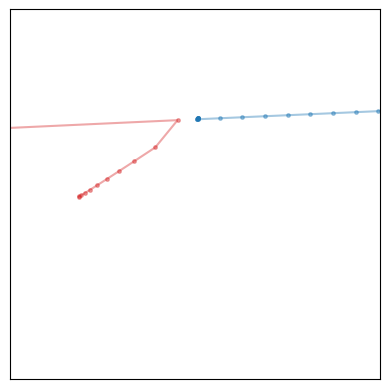

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

nbody.plot_trajectory(trajectory, t_span, ax)